In [32]:
import pandas as pd
df = pd.read_csv('wine_train.csv')
df.shape

(3673, 12)

In [33]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.854724,0.277953,0.335108,6.413613,0.045710,35.368500,138.626736,0.994026,3.189834,0.489115,10.525709,5.893820
std,0.848973,0.099913,0.123156,5.054275,0.021747,16.974746,42.641142,0.003016,0.152739,0.112433,1.243642,0.892749
min,3.800000,0.080000,0.000000,0.600000,0.012000,3.000000,9.000000,0.987110,2.720000,0.250000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991700,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.010000,14.200000,9.000000


In [34]:
#Change to ranges of bad 0, normal 1, good 2
codes = {0 : 'bad', 1 : 'normal', 2 : 'good' }
df.quality = [0 if x < 6 else (1 if x == 6 else 2 ) for x in df.quality ]
#Cast all to float
#df.quality = df.quality.apply(lambda s: float(s))

Continuous Variables

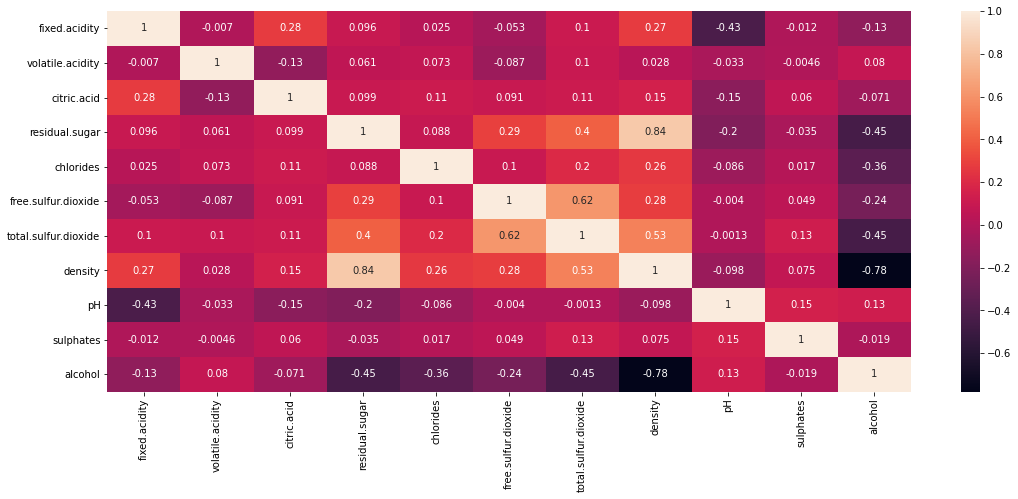

In [35]:
import matplotlib
import matplotlib.pyplot as plt
ignore = ['quality']
var = [x for x in df.columns if x not in ignore]
import seaborn as sb
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sb.heatmap(df[var].corr(),annot=True)
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler
features = ['free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'alcohol']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca_1','pca_2'])

In [37]:
new = pd.concat([principalDf, df.drop(columns = features)], axis = 1)

In [38]:
#Remove outliers
from scipy import stats
import numpy as np
new = new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]

In [39]:
#Split - OHE
X, y = new.drop(columns = ignore), new.quality.astype(float)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.4, random_state = 135)
#F1 Score

In [40]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=40,random_state=0)
#clf = RandomForestClassifier()
# fit the model
clf.fit(X_train, y_train)
# checking the accuracy score
rnd_score = clf.score(X_test, y_test)

print('score of model is : ', rnd_score)


score of model is :  0.43004463198462795
